In [1]:
!pip install pandas --quiet

In [2]:
import sys

In [3]:
!pip install opendatasets --upgrade --quiet

In [4]:
dataset_url = 'https://www.kaggle.com/camnugent/sandp500'

In [5]:
import opendatasets as od

In [6]:
od.download(dataset_url)

Skipping, found downloaded files in ".\sandp500" (use force=True to force download)


In [7]:
import os

In [8]:
data_dir = './sandp500'

In [9]:
os.listdir(data_dir)

['all_stocks_5yr.csv', 'getSandP.py', 'individual_stocks_5yr', 'merge.sh']

In [10]:
train_csv = data_dir + '/all_stocks_5yr.csv'

In [11]:
!pip install pandas

In [12]:
import pandas as pd

In [34]:
raw_df = pd.read_csv(train_csv)
raw_df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [35]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [36]:
raw_df.dropna(subset=['close', 'low', 'high', 'open', 'volume'], inplace=True) #dropna eliminates any value with null value

In [37]:
raw_df.info() #the null values were eliminated as the row of items decrease to 619029

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619029 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619029 non-null  object 
 1   open    619029 non-null  float64
 2   high    619029 non-null  float64
 3   low     619029 non-null  float64
 4   close   619029 non-null  float64
 5   volume  619029 non-null  int64  
 6   Name    619029 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 37.8+ MB


In [38]:
raw_df.describe()

,open,high,low,close,volume
count,619029.000000,619029.000000,619029.000000,619029.000000,6.190290e+05
mean,83.023334,83.778419,82.256200,83.043305,4.321892e+06
std,97.378769,98.207735,96.507634,97.388913,8.693671e+06
min,1.620000,1.690000,1.500000,1.590000,1.010000e+02
25%,40.220000,40.620000,39.830000,40.240800,1.070351e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082165e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284550e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [39]:
raw_df.close.corr(raw_df.open)

0.9998719317422582

In [40]:
raw_df.close.corr(raw_df.high)

0.9999363707838036

In [41]:
raw_df.close.corr(raw_df.low)

0.9999391836701348

In [42]:
raw_df.close.corr(raw_df.volume)

-0.14280236369618454

In [45]:
raw_df.corr() # It appears the low as the most correlation with the close stock price

,open,high,low,close,volume
open,1.000000,0.999939,0.999928,0.999872,-0.142705
high,0.999939,1.000000,0.999903,0.999936,-0.142316
low,0.999928,0.999903,1.000000,0.999939,-0.143240
close,0.999872,0.999936,0.999939,1.000000,-0.142802
volume,-0.142705,-0.142316,-0.143240,-0.142802,1.000000


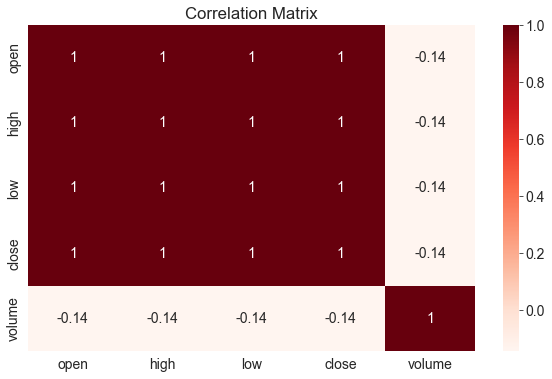

In [46]:
sns.heatmap(raw_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

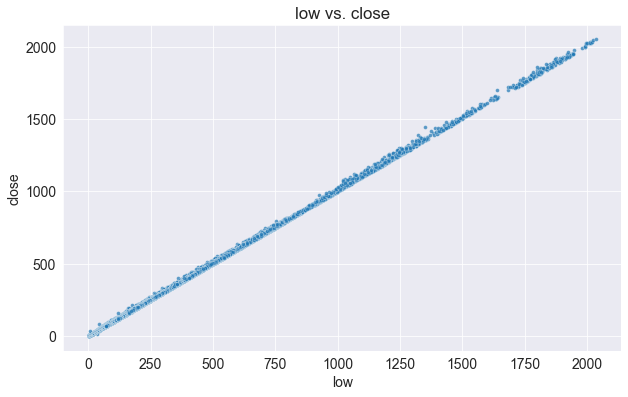

In [47]:
plt.title('low vs. close')
sns.scatterplot(data=raw_df, x='low', y='close', alpha=0.7, s=15);

In [53]:
def estimate_close(low, w, b):
    return w * low + b

In [54]:
w = 50
b = 100

In [56]:
low = raw_df.low
estimated_close = estimate_close(low, w, b)

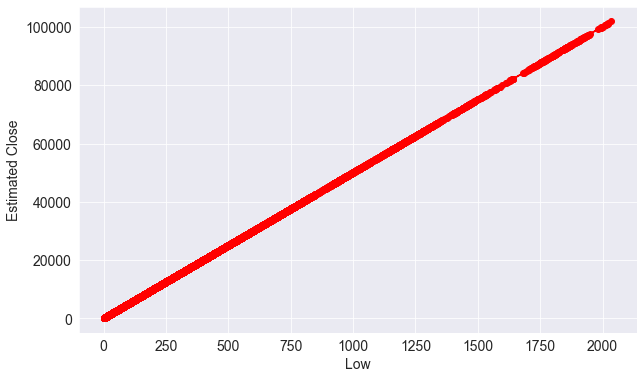

In [57]:
plt.plot(low, estimated_close, 'r-o');
plt.xlabel('Low');
plt.ylabel('Estimated Close');